In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from utilities import *

In [2]:
x,y = make_blobs(n_samples=100 ,n_features=2 ,centers=2,random_state=0)

In [3]:
y = y.reshape(-1,1)
y.shape

(100, 1)

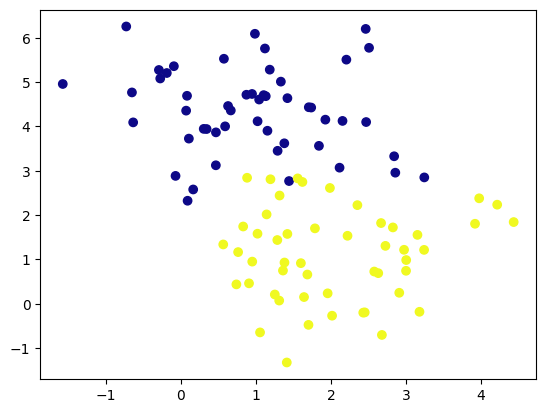

In [4]:
plt.scatter(x[:,0] ,x[: ,1] ,c=y ,cmap='plasma')
plt.show()

In [5]:
class Neurone:
    def __init__(self,X,learning_rate = 0.01,n_iter = 1000):
        n,m = X.shape
        self.w = np.random.rand(m , 1)
        self.b = np.random.rand(1,1)
        self.learning_rate = learning_rate
        self.iter = n_iter

    def sigmoid(self,X):
        return 1/(1+np.exp(-X))

    def model(self,X):
        Z = X.dot(self.w) + self.b
        return Z
    def cost(self,X,y):
        n,_ = X.shape
        Z= self.model(X)
        A = self.sigmoid(Z)
        return -(np.sum(y*np.log(A) +(1-y)*np.log(1-A)))/n
    
    def gradients(self,X,y):
        n,_ = X.shape
        Z= self.model(X)
        A = self.sigmoid(Z)
        dw = (X.T).dot(A-y)/n
        db = (np.sum(A - y))/n
        return dw,db
    
    def update(self,dw,db):
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db

    def predict(self,X):
        Z= self.model(X)
        A = self.sigmoid(Z)
        A[A<0.5]=0
        A[A>=0.5]=1
        return A

    def neurone_artificial(self,X,y):
        history =[]
        for i in range(self.iter):
            dw,db = self.gradients(X,y)
            self.update(dw,db)
            history.append(self.cost(X,y))
        plt.plot(history)
        plt.show()

    
    


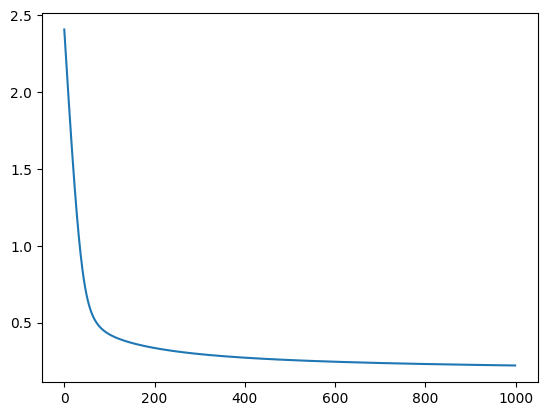

In [6]:
nerone = Neurone(x)
nerone.neurone_artificial(x,y)


In [7]:
y_pred = nerone.predict(x)
accuracy_score(y,y_pred)

0.9

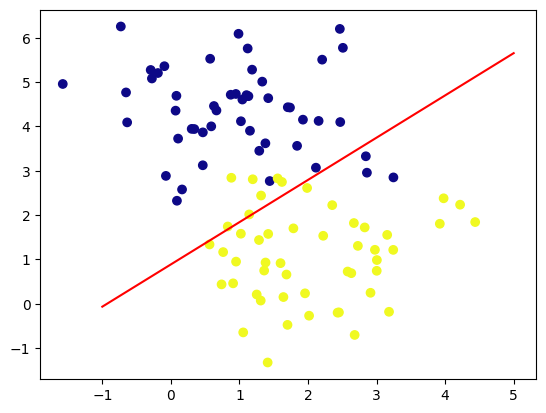

In [8]:
w=nerone.w
b=nerone.b
x0 = np.linspace(-1,5,100)
x1 = (-w[0]*x0 - b)/w[1]
x1=x1.reshape(100,1)
plt.scatter(x[:,0],x[:,1],c=y ,cmap="plasma")
plt.plot(x0,x1,c='red')
plt.show()

In [9]:
x_train,x_test,y_train,y_test = load_data()

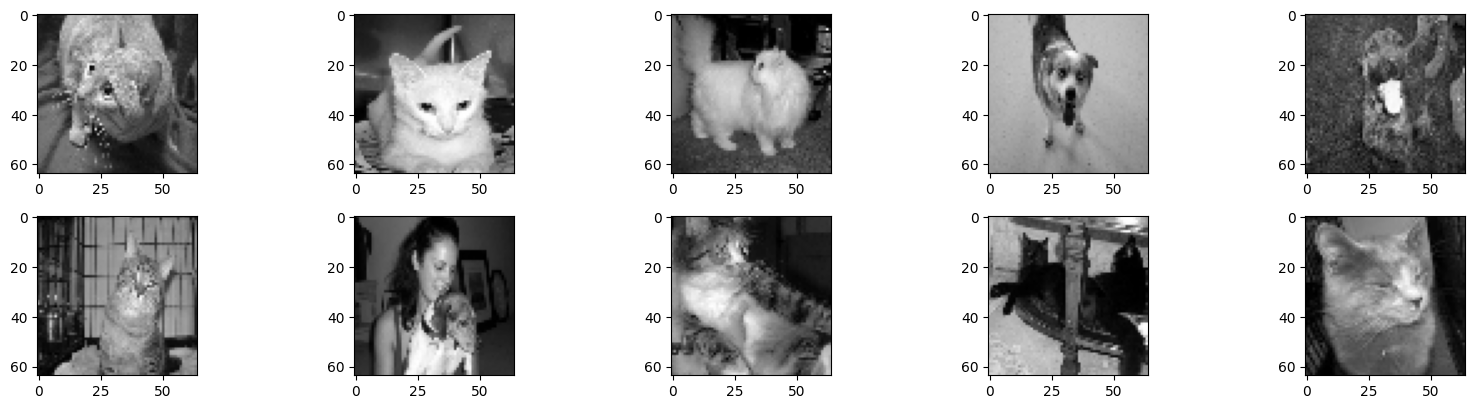

In [13]:
plt.figure(figsize=(16,8))
for i in range(1,11):
    plt.subplot(4,5,i)
    plt.imshow(x_train[i],cmap='gray')
    # plt.title(y_train[i])
    plt.tight_layout()
plt.show()

## Loading . . . .